<a href="https://colab.research.google.com/github/minshyee/VGameDataAnalysis-Project/blob/main/game_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_use.csv to df_use.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('df_use.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,250
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10,200
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0,10
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130,790
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30,380


# 지역에 따라 선호하는 게임장르가 다를까


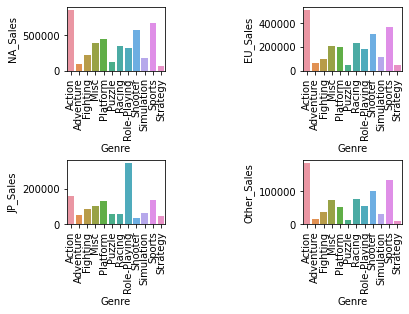

In [ ]:
g_byloc = df.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
g_byloc = g_byloc.groupby(df['Genre']).sum().reset_index()
g_byloc

plt.subplot(3,3,1)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['NA_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,3)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['EU_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,7)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['JP_Sales'])
plt.xticks(rotation =90)

plt.subplot(3,3,9)
sns.barplot(x=g_byloc['Genre'], y=g_byloc['Other_Sales'])
# plt.title("지역 별, 장르 수입액")
plt.xticks(rotation =90)
plt.show()

## 정리
대부분의 나라에서 Action장르가 가장 많은 출고량을 보였으나
일본의 경우 Role-playing 장르가 압도적으로 높은것을 발견하였다.

최대 출고량을 비교했을때 미국과 유럽의 출고량이 일본을 포함한 다른 나라들의 출고량이 2배 이상 높은 수치를 보이고 있음을 알고 있따.

- 그래프 예쁘게 만들기
- 출고량 단위를 변경?


# 연도별 게임의 트렌드가 있을까?


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

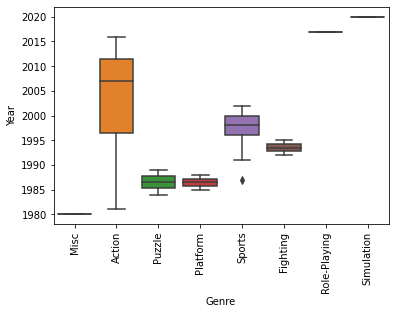

In [ ]:
#연도별 게임의 인기출시장르
gcount_by_year = df['Genre'].groupby(df['Year']).value_counts()
gcount_by_year = pd.DataFrame(gcount_by_year)

prev=gcount_by_year.index[0][0]
f_games = [gcount_by_year.index[0]]

for i in range(len(gcount_by_year)):
  if gcount_by_year.index[i][0] != prev:
    prev = gcount_by_year.index[i][0]
    f_games.append(gcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Genre'])

sns.boxplot(y = f_games['Year'], x = f_games['Genre']) #box , strip, violin  중 하나로
plt.xticks(rotation =90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

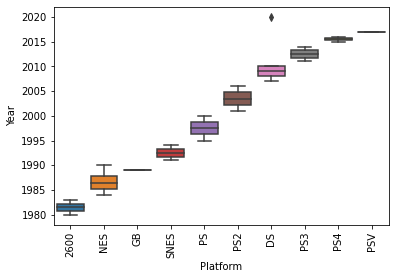

In [ ]:
#연도별 게임의 인기출시플랫폼
pcount_by_year = df['Platform'].groupby(df['Year']).value_counts()
pcount_by_year = pd.DataFrame(pcount_by_year)

prev=pcount_by_year.index[0][0]
f_games = [pcount_by_year.index[0]]

for i in range(len(pcount_by_year)):
  if pcount_by_year.index[i][0] != prev:
    prev = pcount_by_year.index[i][0]
    f_games.append(pcount_by_year.index[i])
  else:
    continue

f_games = pd.DataFrame(f_games, columns=['Year','Platform'])

sns.boxplot(y = f_games['Year'], x = f_games['Platform']) #box , strip, violin  중 하나로
plt.xticks(rotation =90)

# 계열별로 묶어서 빈도 확인하기
- 닌텐도계열 : DS, Wii, GBA, 3DS, WiiU, GB, NES, N64
- PS계열 : PSP, PS3, PS, PS4, PS2, PSV
- XBOX계열 : XB, X360, XOne

# 출고량이 높은 게임에 대한 분석 및 시각화

In [ ]:
df_sales = df.sort_values('total_sales',ascending=False).reset_index(drop=True)

In [ ]:
df_sales.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490,29020,3770,8460,82740
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080,3580,6810,770,40240
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850,12880,3790,3310,35830
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750,11010,3280,2960,33000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270,8890,10220,1000,31380
...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3240,1350,2420,430,7440
96,Call of Duty: World at War,X360,2008,Shooter,Activision,4790,1900,0,690,7380
97,Battlefield 3,X360,2011,Shooter,Electronic Arts,4460,2130,60,690,7340
98,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3830,2190,600,700,7320
